<a href="https://colab.research.google.com/github/shreyansh273/GTx_6501/blob/main/Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving temps.txt to temps.txt


In [5]:
uploaded = files.upload()

Saving uscrime.txt to uscrime.txt


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
temp = pd.read_csv("temps.txt", sep='\t')
crime = pd.read_csv("uscrime.txt", sep='\t')

In [5]:
temp.head()

,DAY,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,1-Jul,98,86,91,84,89,84,90,73,82,91,93,95,85,95,87,92,105,82,90,85
1,2-Jul,97,90,88,82,91,87,90,81,81,89,93,85,87,90,84,94,93,85,93,87
2,3-Jul,97,93,91,87,93,87,87,87,86,86,93,82,91,89,83,95,99,76,87,79
3,4-Jul,90,91,91,88,95,84,89,86,88,86,91,86,90,91,85,92,98,77,84,85
4,5-Jul,89,84,91,90,96,86,93,80,90,89,90,88,88,80,88,90,100,83,86,84


In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [7]:
crime.describe()

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
count,47.000000,47.000000,47.00000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,13.857447,0.340426,10.56383,8.500000,8.023404,0.561191,98.302128,36.617021,10.112766,0.095468,3.397872,5253.829787,19.400000,0.047091,26.597921,905.085106
std,1.256763,0.478975,1.11870,2.971897,2.796132,0.040412,2.946737,38.071188,10.282882,0.018029,0.844545,964.909442,3.989606,0.022737,7.086895,386.762697
min,11.900000,0.000000,8.70000,4.500000,4.100000,0.480000,93.400000,3.000000,0.200000,0.070000,2.000000,2880.000000,12.600000,0.006900,12.199600,342.000000
25%,13.000000,0.000000,9.75000,6.250000,5.850000,0.530500,96.450000,10.000000,2.400000,0.080500,2.750000,4595.000000,16.550000,0.032701,21.600350,658.500000
50%,13.600000,0.000000,10.80000,7.800000,7.300000,0.560000,97.700000,25.000000,7.600000,0.092000,3.400000,5370.000000,17.600000,0.042100,25.800600,831.000000
75%,14.600000,1.000000,11.45000,10.450000,9.700000,0.593000,99.200000,41.500000,13.250000,0.104000,3.850000,5915.000000,22.750000,0.054450,30.450750,1057.500000
max,17.700000,1.000000,12.20000,16.600000,15.700000,0.641000,107.100000,168.000000,42.300000,0.142000,5.800000,6890.000000,27.600000,0.119804,44.000400,1993.000000


In [13]:
cols = crime.columns

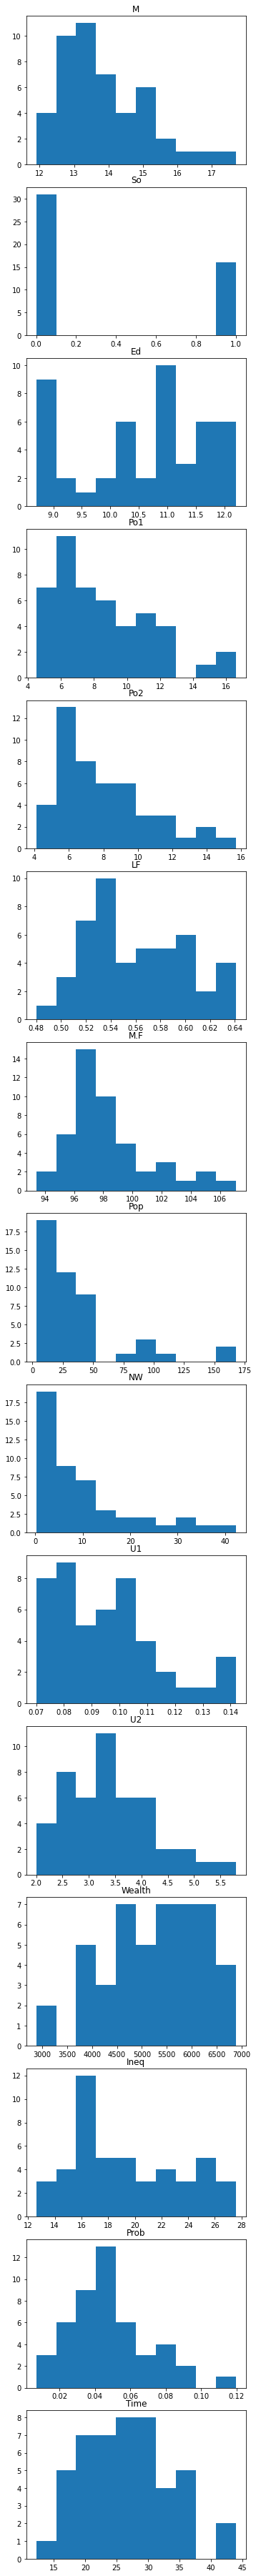

In [68]:
n_rows = 15
fig, ax = plt.subplots(n_rows,figsize=(5,50))
fig.tight_layout()
for i in range(n_rows):
  ax[i].hist(crime[cols[i]])
  ax[i].set_title(cols[i])

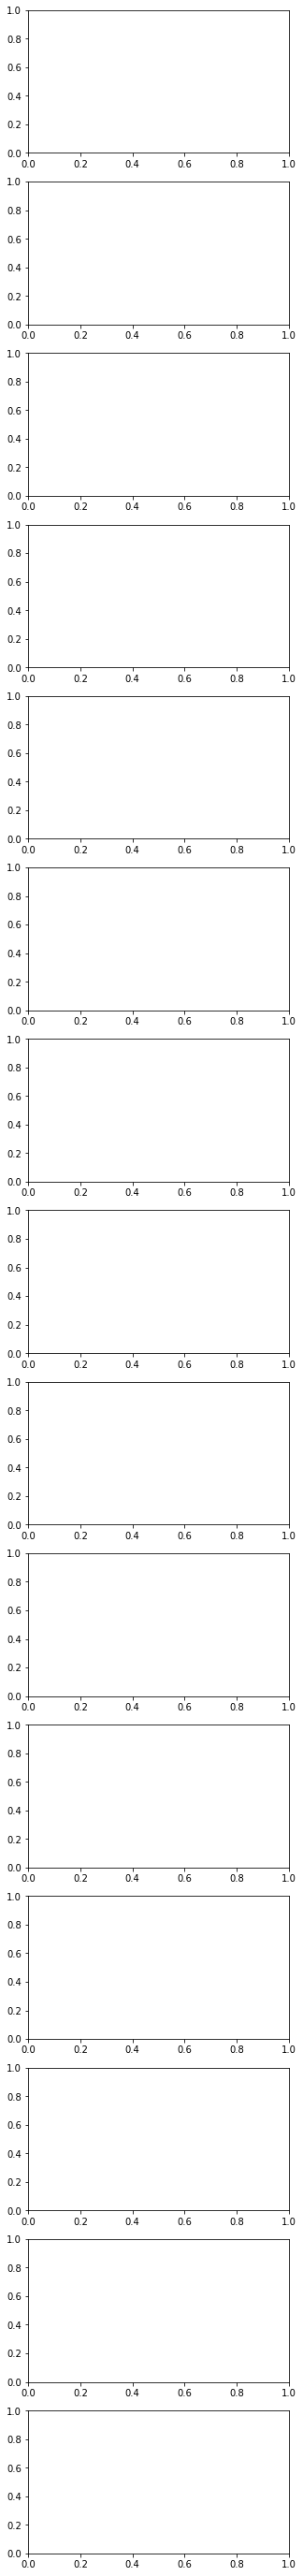

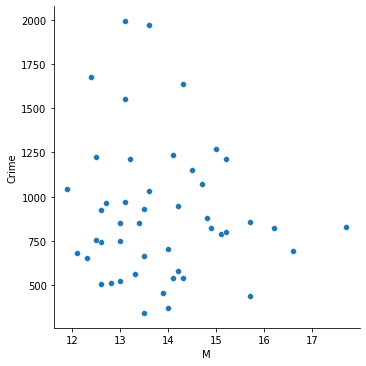

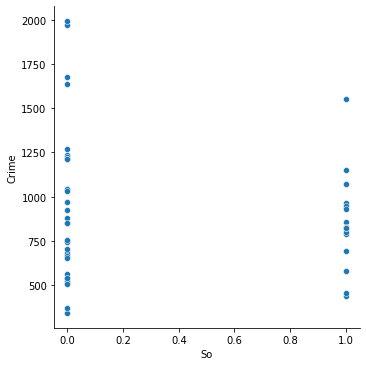

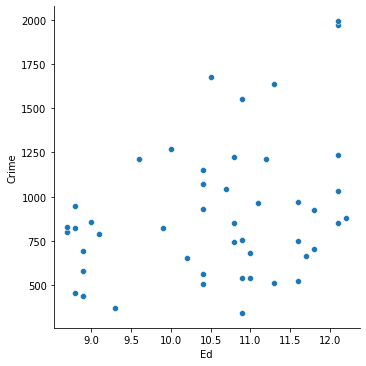

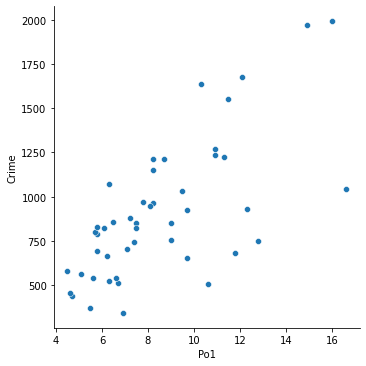

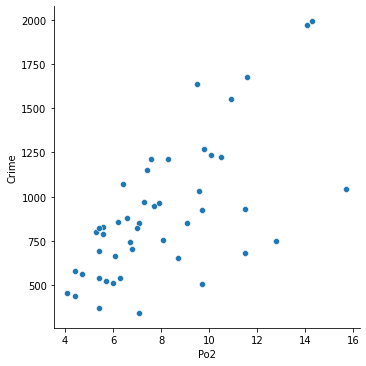

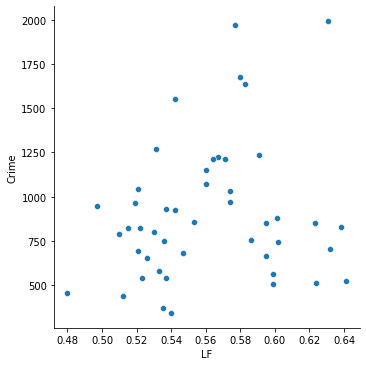

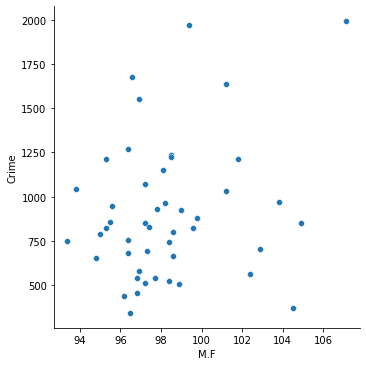

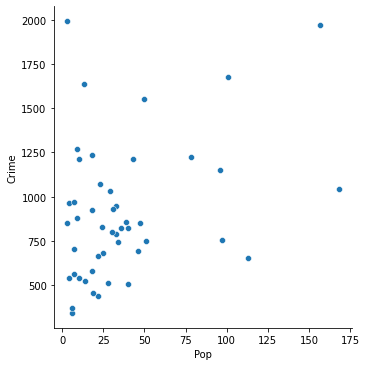

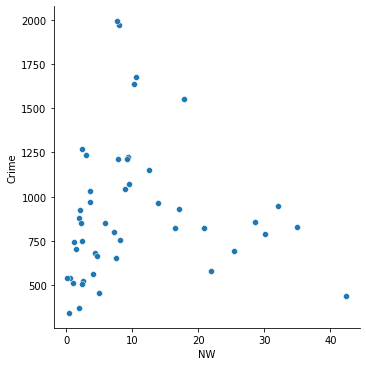

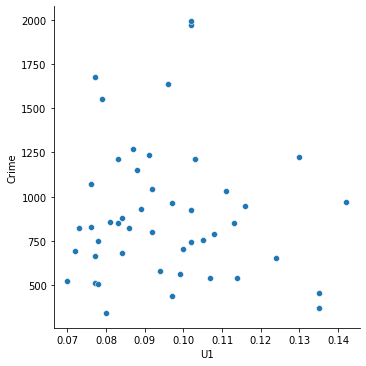

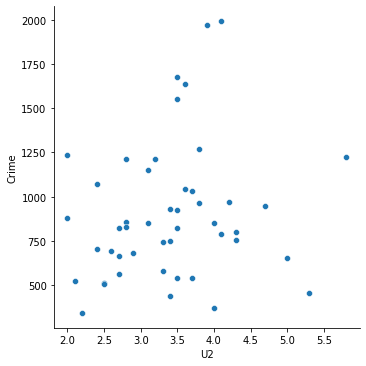

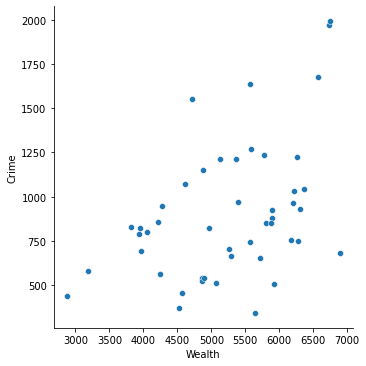

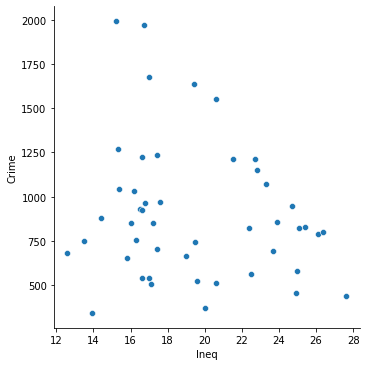

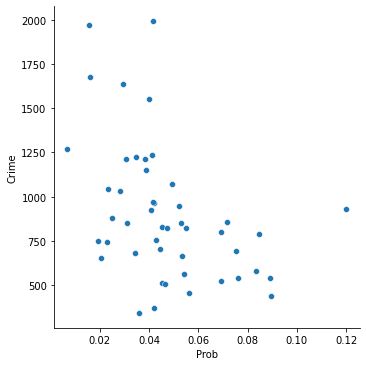

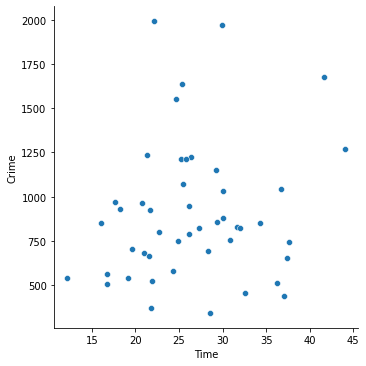

In [33]:
n_rows = 15
ax, fig= plt.subplots(n_rows, 1, figsize=(5, 50))
for i in range(n_rows):
  sns.relplot(x=cols[i], y="Crime", data=crime, kind='scatter')

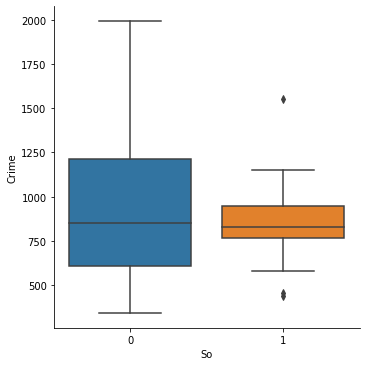

In [36]:
sns.catplot(x="So", y="Crime", data=crime, kind="box")

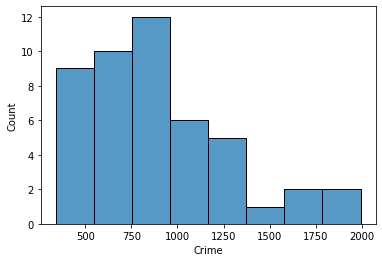

In [65]:
sns.histplot(x="Crime", data=crime)

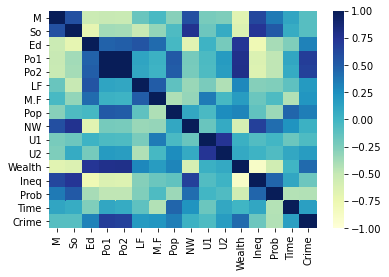

In [182]:
sns.heatmap(crime.corr(), cmap="YlGnBu", vmin=-1)

In [183]:
crime.corr()

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
M,1.000000,0.584355,-0.530240,-0.505737,-0.513173,-0.160949,-0.028680,-0.280638,0.593198,-0.224381,-0.244843,-0.670055,0.639211,0.361116,0.114511,-0.089472
So,0.584355,1.000000,-0.702741,-0.372636,-0.376168,-0.505469,-0.314733,-0.049918,0.767103,-0.172419,0.071693,-0.636945,0.737181,0.530862,0.066813,-0.090637
Ed,-0.530240,-0.702741,1.000000,0.482952,0.499410,0.561178,0.436915,-0.017227,-0.664882,0.018103,-0.215682,0.735997,-0.768658,-0.389923,-0.253974,0.322835
Po1,-0.505737,-0.372636,0.482952,1.000000,0.993586,0.121493,0.033760,0.526284,-0.213709,-0.043698,0.185093,0.787225,-0.630500,-0.473247,0.103358,0.687604
Po2,-0.513173,-0.376168,0.499410,0.993586,1.000000,0.106350,0.022843,0.513789,-0.218768,-0.051712,0.169224,0.794262,-0.648152,-0.473027,0.075627,0.666714
LF,-0.160949,-0.505469,0.561178,0.121493,0.106350,1.000000,0.513559,-0.123672,-0.341214,-0.229400,-0.420762,0.294632,-0.269886,-0.250086,-0.123640,0.188866
M.F,-0.028680,-0.314733,0.436915,0.033760,0.022843,0.513559,1.000000,-0.410628,-0.327305,0.351892,-0.018692,0.179609,-0.167089,-0.050858,-0.427697,0.213914
Pop,-0.280638,-0.049918,-0.017227,0.526284,0.513789,-0.123672,-0.410628,1.000000,0.095153,-0.038120,0.270422,0.308263,-0.126294,-0.347289,0.464210,0.337474
NW,0.593198,0.767103,-0.664882,-0.213709,-0.218768,-0.341214,-0.327305,0.095153,1.000000,-0.156450,0.080908,-0.590107,0.677313,0.428059,0.230398,0.032599
U1,-0.224381,-0.172419,0.018103,-0.043698,-0.051712,-0.229400,0.351892,-0.038120,-0.156450,1.000000,0.745925,0.044857,-0.063832,-0.007469,-0.169853,-0.050478


In [37]:
X = crime.drop("Crime", axis=1)
y = crime["Crime"]

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

In [42]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [162]:
scaler2 = MinMaxScaler()
y_train_scaled = scaler2.fit_transform(np.array(y_train).reshape(-1,1)).flatten()
y_test_scaled = scaler2.transform(np.array(y_test).reshape(-1,1)).flatten()

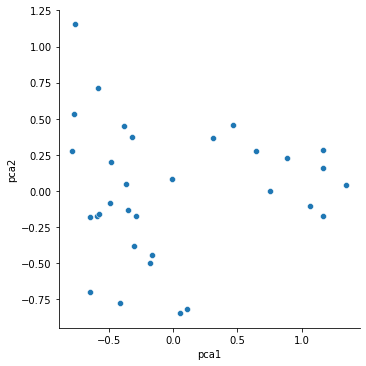

In [191]:
pca = PCA(n_components=2, random_state=52)
pca_df = pd.DataFrame(pca.fit_transform(X_train_scaled), columns=['pca1','pca2'])
sns.relplot(x='pca1',y='pca2', data=pca_df)

In [195]:
pca = PCA(n_components=15, random_state=52)
pca.fit_transform(X_train_scaled)
pca.explained_variance_ratio_.cumsum()

array([0.42182759, 0.61234667, 0.74133514, 0.83471857, 0.87323407,
       0.90327343, 0.93133135, 0.94994774, 0.96580257, 0.97728548,
       0.98455476, 0.99048943, 0.99544834, 0.99978325, 1.        ])

In [200]:
pca = PCA(n_components=6, random_state=52)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [163]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train_scaled)
linreg_pred = linreg.predict(X_test_scaled)
linreg_pred2 = linreg.predict(X_train_scaled)

In [164]:
print(1-mean_absolute_error(y_train_scaled, linreg_pred2))
print(1-mean_absolute_error(y_test_scaled, linreg_pred))

0.8942196786745005
0.8855616016922243


Text(0.5, 1.0, 'Test')

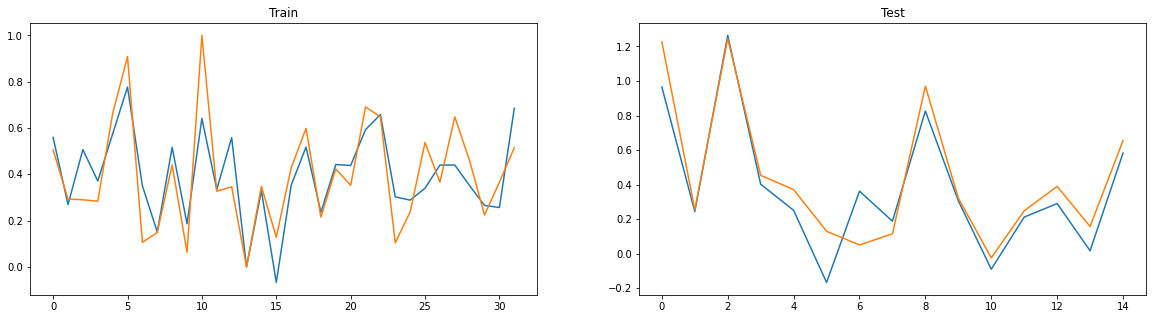

In [165]:
fix, ax=plt.subplots(1,2, figsize=(20,5))
ax[0].plot(linreg.predict(X_train_scaled))
ax[0].plot(y_train_scaled)
ax[0].set_title("Train")
ax[1].plot(linreg_pred)
ax[1].plot(y_test_scaled)
ax[1].set_title("Test")

In [166]:
model_coef = pd.DataFrame({'name':np.array(X.columns), 'coef':linreg.coef_.flatten()})
model_coef

,name,coef
0,M,0.162075
1,So,-0.008140
2,Ed,0.474364
3,Po1,1.748487
4,Po2,-0.835547
5,LF,-0.075337
6,M.F,0.209519
7,Pop,-0.252208
8,NW,0.189438
9,U1,-0.268077


In [109]:
from sklearn.linear_model import LassoCV

In [201]:
lasso = LassoCV(cv=5, random_state=52, normalize=True)
lasso.fit(X_train_pca, y_train_scaled)
lasso_pred = lasso.predict(X_test_pca)
lasso_pred2 = lasso.predict(X_train_pca)

In [202]:
print(1-mean_absolute_error(y_train_scaled, lasso_pred2))
print(1-mean_absolute_error(y_test_scaled, lasso_pred))


0.8409556208105826
0.750711289466037


Text(0.5, 1.0, 'Test')

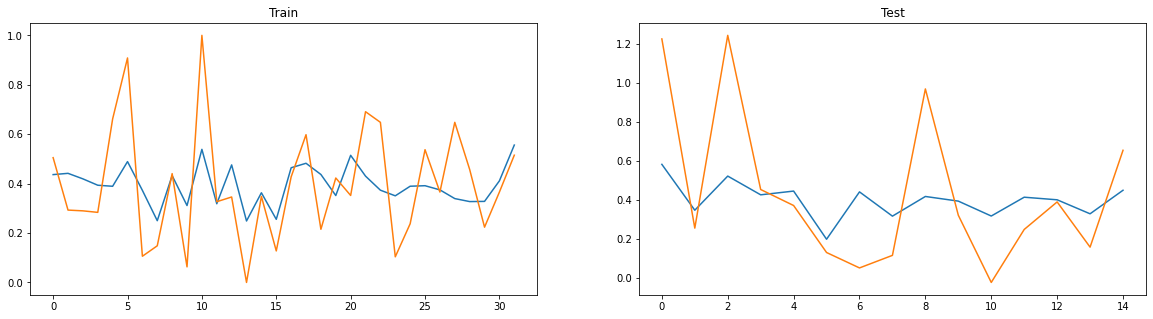

In [203]:
fix, ax=plt.subplots(1,2, figsize=(20,5))
ax[0].plot(lasso_pred2)
ax[0].plot(y_train_scaled)
ax[0].set_title("Train")
ax[1].plot(lasso_pred)
ax[1].plot(y_test_scaled)
ax[1].set_title("Test")

In [167]:
from sklearn.ensemble import RandomForestRegressor

In [168]:
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train_scaled)
rf_pred = rf.predict(X_test_scaled)
rf_pred2 = rf.predict(X_train_scaled)

In [169]:
print(1-mean_absolute_error(y_test_scaled, rf_pred))
print(1-mean_absolute_error(y_train_scaled, rf_pred2))

0.7935680245964641
0.9399711760184474


Text(0.5, 1.0, 'Test')

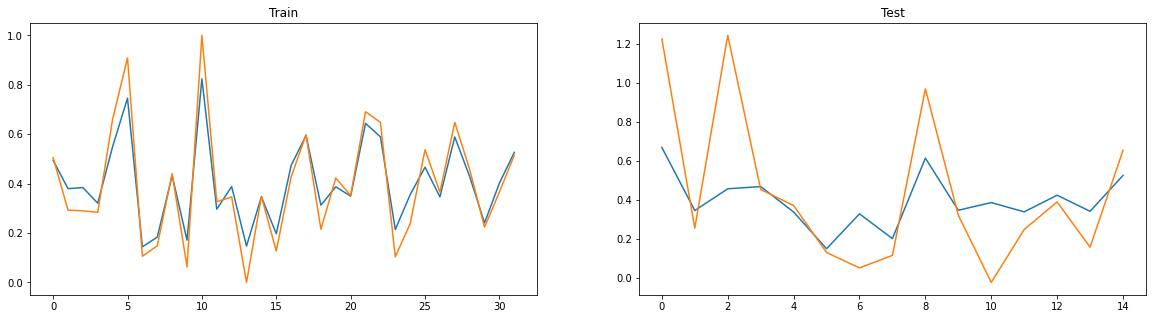

In [170]:
fix, ax=plt.subplots(1,2, figsize=(20,5))
ax[0].plot(rf_pred2)
ax[0].plot(y_train_scaled)
ax[0].set_title("Train")
ax[1].plot(rf_pred)
ax[1].plot(y_test_scaled)
ax[1].set_title("Test")